# Importing libraries

In [3]:
import numpy as np 
import pandas as pd 
import math 
import matplotlib.pyplot as plt 
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier Class

In [27]:
class KNNClassifier():
    
    def __init__(self):
        print("")
        global k
        k = 3
        label_training = np.empty(2)
        X_train = np.empty(2)


    def predict_values_for_validation(self, train_data, test_data, label_data, k, distance_function):
        final_labels = []
        for j in range(len(test_data)):
            distance_labels_and_indexes = []
            labels = []
            dist = 0
            for i in range(len(train_data)):
                dist = self.euclidean(train_data[i,:], test_data[j,:])
                distance_labels_and_indexes.append((dist, i))
            sorted_dist = sorted(distance_labels_and_indexes)
            first_k_values = sorted_dist[:k]
            for dist,i in first_k_values:
                index = i
                labels.append(label_data[i])
            label =  self.mode(labels)
            final_labels.append(label)
        return final_labels
    
    
    def predict_values_for_validation_for_manhattan(self, train_data, test_data, label_data, k, distance_function):
        final_labels = []
        for j in range(len(test_data)):
            distance_labels_and_indexes = []
            labels = []
            dist = 0
            for i in range(len(train_data)):
                dist = self.manhattan(train_data[i,:], test_data[j,:])
                distance_labels_and_indexes.append((dist, i))
            sorted_dist = sorted(distance_labels_and_indexes)
            first_k_values = sorted_dist[:k]
            for dist,i in first_k_values:
                index = i
                labels.append(label_data[i])
            label =  self.mode(labels)
            final_labels.append(label)
        return final_labels



    def euclidean(self,a, b):
        dist = np.linalg.norm(a-b)
        return dist 

    def manhattan(self,ippt,testpt):
        sum_ = 0
        for i in range(len(testpt)):
            sum_ += abs(ippt[i] - testpt[i])

        return sum_
    
    def mode(self,labels):
        return Counter(labels).most_common(1)[0][0]




    def handle_missing_values(self,data):
        for i in range(data.shape[1]):
            item_counts = Counter(data[:,i])
            max_item = item_counts.most_common()[0][0]
        for i in range(0,data.shape[0]):
            if data[i,10] == '?':
                  data[i,10] = 'b' 
        return data
    
    
    def predict_values_for_k(self, test_data_path):
        accuracies = []
        test_data = pd.read_csv(test_data_path, header=None)
        test_data = test_data.values
        temp_test_data = test_data [:40]
        temp_test_data = self.handle_missing_values(temp_test_data)
        temp_test_data = self.fit_transform(temp_test_data,lists)
        
        for k in range(1,7,2):
            labels = self.predict_values_for_validation(self.X_train, temp_test_data, self.label_training, k, distance_function='euclidean')
            acc = accuracy_score()
        return labels
        
    
    
    def predict(self,test_data_path):
        test_data = pd.read_csv(test_data_path, header=None)
        test_data = test_data.values
        temp_test_data = test_data
        temp_test_data = self.handle_missing_values(temp_test_data)
        temp_test_data = self.fit_transform(temp_test_data,lists)
        for k in range(1,7,2):
            labels = self.predict_values_for_validation(self.X_train, temp_test_data, self.label_training, k, distance_function='euclidean')
        return labels
        
    def unique_keys(self,data):
        df = np.array(data)
        dictionary = []
        lists = []
        for i in range(0,df.shape[1]):
            dictval = {}
            set1= set()
            for j in range(len(df)):
                set1.add(df[j][i])
            count=0
            li = []
            if i == 6:
                set1.add('n')
                set1.add('d')
            if i == 7:
                set1.add('d')
            if i == 11:
                set1.add('u')
                set1.add('z')
            if i == 16:
                set1.add('u')
            if i == 19:
                set1.add('c')
                set1.add('s')
                set1.add('z')
            val = 0
            for j in set1:
                dictval[j] = val
                li.append((j,val))
                val += 1
                count +=1
            lists.append(dictval)
            dictionary.append(li)
        return lists
    
    def fit_transform(self, data, lists):
        one_hot = np.empty((data.shape[0],0),dtype='int')
        nrows = data.shape[0]
        for i in range(len(lists)):
            ncols = len(lists[i])
            df = np.zeros((nrows, ncols),dtype='int')
            j = i
            tempdict = lists[i]
            for k in range(nrows):
                index = tempdict.get(data[k,j])
                df[k,index] = 1
            one_hot = np.concatenate((one_hot,df),axis=1)
        df = np.zeros((nrows,1),dtype='int')
        tempdict = lists[i]
        for k in range(nrows):
            index = tempdict.get(data[k,j])
            df[k,0] = int(index)
        one_hot = np.concatenate((df,one_hot),axis=1)
        return one_hot
        
    
    def train(self, data_path):
        data = pd.read_csv(data_path)
        data = data.sample(frac=1).reset_index(drop=True)
        data = data.values
        self.label_training = data[:,0]
        training_data = data[:,1:]
        '''self.X_train = self.handle_missing_values(training_data)
        global lists 
        lists = self.unique_keys(data)
#         print(lists)
        label_lists = lists[0]
        lists = lists[1:]
#         print(lists)
        self.X_train = self.fit_transform(training_data,lists)
#         print(self.X_train,' ', self.X_train.shape)'''
        training_data = data[:4400, :]
        
        validation_data = data[4400:,]
        
        label_validation = validation_data[:,0]
        self.label_training = training_data[:,0]
        
        training_data = training_data[:, 1:]
        
        validation_data = validation_data[:,1:]
        
        
        training_data = self.handle_missing_values(training_data)
        
        validation_data = self.handle_missing_values(validation_data)
        
        lists = self.unique_keys(data)
        label_lists = lists[0]
        lists = lists[1:]
        
        
        self.X_train = self.fit_transform(training_data,lists)
        
        X_validation = self.fit_transform(validation_data,lists)
        accuracies = []
        
        print(self.label_training)
        
        for i in range(1,7,2):
            k  = i
           
            neigh = KNeighborsClassifier(n_neighbors=i)
            accuracy_euclidean = self.predict_values_for_validation(self.X_train, X_validation,self.label_training, k  , distance_function = 'euclidean') 
            accuracy_manhattan = self.predict_values_for_validation_for_manhattan(self.X_train, X_validation,self.label_training, k  , distance_function = 'manhattan')
            value_euclidean = accuracy_score(label_validation, accuracy_euclidean)
            value_manhattan = accuracy_score(label_validation, accuracy_manhattan)
            accuracies.append((value_euclidean, value_manhattan))
            print("euclidean distance for k : ",k)
            print(classification_report(label_validation, accuracy_euclidean))
            print(confusion_matrix(label_validation, accuracy_euclidean))
            print("manhattan distance for k: ", k)
            print(classification_report(label_validation, accuracy_manhattan))
            print(confusion_matrix(label_validation, accuracy_euclidean))
            print(confusion_matrix(label_validation, accuracy_manhattan))
            print("SKlearn KNN Classifier")
            neigh.fit(self.X_train, self.label_training)
            values = neigh.predict(X_validation)
            print("accuracy = ",accuracy_score(label_validation, values))
       
        return accuracies
        
    
    

# evaluating euclidean and manhattan distance
# different values for k

In [28]:
knn = KNNClassifier()
value = knn.train("/home/ubuntu/Desktop/smai/Datasets/q2/train.csv")


['p' 'p' 'p' ... 'e' 'p' 'e']
euclidean distance for k :  1
              precision    recall  f1-score   support

           e       1.00      1.00      1.00        34
           p       1.00      1.00      1.00        61

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

[[34  0]
 [ 0 61]]
manhattan distance for k:  1
              precision    recall  f1-score   support

           e       1.00      1.00      1.00        34
           p       1.00      1.00      1.00        61

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

[[34  0]
 [ 0 61]]
[[34  0]
 [ 0 61]]
SKlearn KNN Classifier
accuracy =  1.0
euclidean distance for k :  3
              precision    recall  f1-score   support

           e       1.00      1.00      1.00        34
           p       1.

In [29]:

# knn = KNNClassifier()
# value = knn.train("/home/ubuntu/Desktop/smai/Datasets/q2/train.csv")
# print(value)


# k_values = [1,3,5]
# pred = knn.predict("/home/ubuntu/Desktop/smai/Datasets/q2/test.csv")
# # print(pred)
# test_labels = list()
# with open("/home/ubuntu/Desktop/smai/Datasets/q2/test_labels.csv") as f:
#     for line in f:
#         test_labels.append(line.strip())
# print (accuracy_score(test_labels, pred))
# print(confusion_matrix(test_labels, pred))
# print(classification_report(test_labels, pred))

    

# Plotting Graph for different values of K

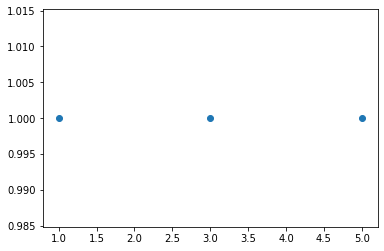

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
euclidean distance 


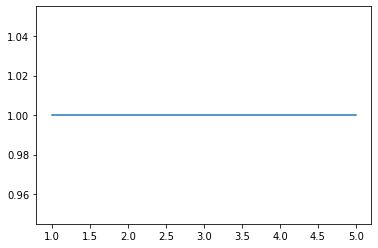

manhattan distance 


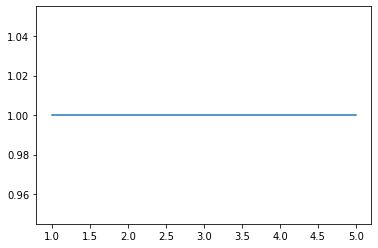

In [30]:
eculidean_distance = []
manhattan_distance = []
k_values = [1,3,5]
for i in range(len(value)):
    eculidean_distance.append(value[i][0])
    manhattan_distance.append(value[i][1])
plt.scatter(k_values, eculidean_distance)
plt.show()
print(eculidean_distance)
print(manhattan_distance)
print("euclidean distance ")
plt.plot(k_values, eculidean_distance)
plt.show()

print("manhattan distance ")
plt.plot(k_values, eculidean_distance)
plt.show()